# Questions
## From a dataset of reported type 1 crimes in Houston Texas from 2010- 2017

- Type of offense  max values
- Total crimes by week
- Total crimes by Month
- Total crimes by Year
- Total crimes by the Hour
- Total crimes by the top 10 Premise locations
- Total crimes by the top 10 (Police) Beat location
- Compare the two lowest offense types (rape & murder) by Year, Month, Weekday

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style("darkgrid")
sns.set_context("notebook")
current_palette = sns.color_palette("hls", 8)

In [2]:
path = 'crime_final_clean10_17.csv'

In [3]:
data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006326 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1006326 non-null object
BlockRange     1006169 non-null object
StreetName     1006300 non-null object
OffenseType    1006326 non-null object
Premise        1006326 non-null object
NumOffenses    1006326 non-null float64
Hour           65536 non-null float64
day            1006326 non-null int64
weekday        1006326 non-null object
month          1006326 non-null object
year           1006326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 92.1+ MB


In [4]:
data.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-09-08,24C60,12700-12799,LAKE HOUSTON,Burglary,RESTAURANT OR CAFETERIA,1.0,7.0,8,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,BELLAIRE,Burglary,MISCELLANEOUS BUSINESS (NON-SPECIFIC),1.0,3.0,2,Monday,Nov,1914
1914-12-03,12D20,12800-12899,GULF,Auto Theft,NO LABEL,1.0,19.0,3,Thursday,Dec,1914
1915-01-05,3B10,3200-3299,MANGUM RD 180,Theft,OTHER PARKING LOT,1.0,NaN,5,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,WESTVIEW,Auto Theft,APARTMENT PARKING LOT,1.0,NaN,14,Thursday,Jan,1915


## Extract events from the year 2010 - 2017

In [5]:
# extract years 2010-2017
df = data.loc['2010':'2017']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003745 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           1003745 non-null object
BlockRange     1003589 non-null object
StreetName     1003719 non-null object
OffenseType    1003745 non-null object
Premise        1003745 non-null object
NumOffenses    1003745 non-null float64
Hour           65454 non-null float64
day            1003745 non-null int64
weekday        1003745 non-null object
month          1003745 non-null object
year           1003745 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 91.9+ MB


## Find some trends

In [57]:
df.year.value_counts()

2010    136357
2013    130200
2012    127486
2011    127168
2016    122423
2014    121451
2015    120079
2017    118581
Name: year, dtype: int64

In [58]:
df.month.value_counts()

Jul    88814
May    88371
Aug    88161
Dec    85838
Jan    85494
Oct    84900
Apr    83105
Jun    82904
Sep    81833
Nov    81506
Mar    81214
Feb    71605
Name: month, dtype: int64

In [59]:
df.OffenseType.value_counts()

Theft                 552802
Burglary              181858
Auto Theft            100730
Aggravated Assault     82865
Robbery                76712
Rape                    6861
Murder                  1903
UNK                       14
Name: OffenseType, dtype: int64

## Plots
- Total crimes by `OffenseType`.
- Total crimes by `weekday`

In [31]:
crimes = df[df.OffenseType.values != 'UNK']  #remove UNK whose value =14

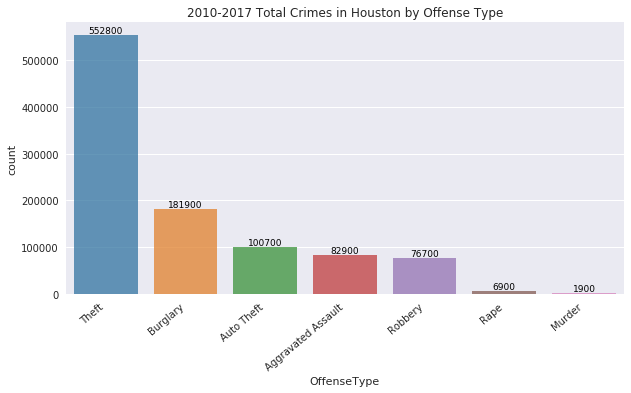

In [62]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="OffenseType", data=crimes,alpha=0.75,
             order=crimes['OffenseType'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017 Total Crimes in Houston by Offense Type');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

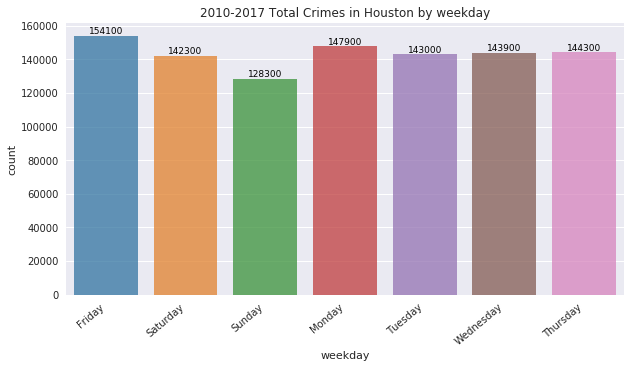

In [64]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="weekday", data=crimes,alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017 Total Crimes in Houston by weekday');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

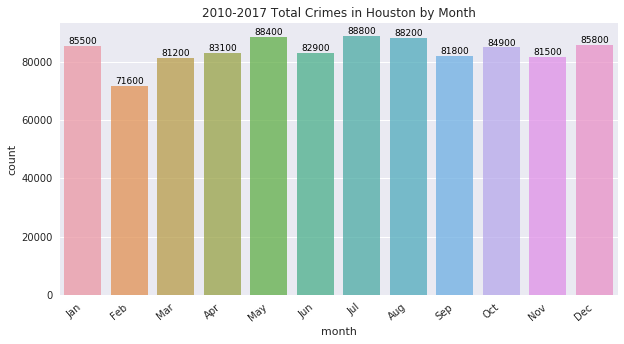

In [65]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="month", data=crimes,alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017 Total Crimes in Houston by Month');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

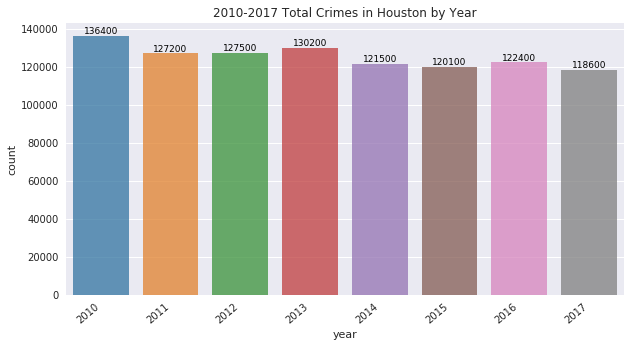

In [68]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="year", data=crimes,alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017 Total Crimes in Houston by Year');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

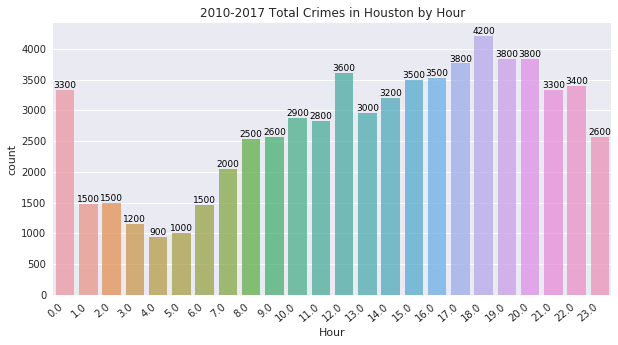

In [69]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="Hour", data=crimes,alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017 Total Crimes in Houston by Hour');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

In [71]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003731 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           1003731 non-null object
BlockRange     1003575 non-null object
StreetName     1003705 non-null object
OffenseType    1003731 non-null object
Premise        1003731 non-null object
NumOffenses    1003731 non-null float64
Hour           65454 non-null float64
day            1003731 non-null int64
weekday        1003731 non-null object
month          1003731 non-null object
year           1003731 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 111.9+ MB


## Create two dataframes
- top 10 police beats
    - The 'Beat'column shows a  describes the area where Houston Police Department covers
- top 10 Premise locations
    - The 'Premise' colum descrives the location where the crime took place, ex: house, parking lot,vacant hospital.

In [72]:
# create a dataframe for the top 10 premises
premises = [premise for premise in crimes['Premise'].value_counts().head(10).reset_index()['index']]
top_premise= pd.DataFrame()  # create empty dataframe

for premise in premises:
    top_premise = pd.concat([top_premise, crimes[crimes.Premise == premise]], axis=0)

In [74]:
# create a dataframe for the top 10 Beats
beats = [beat for beat in crimes['Beat'].value_counts().head(10).reset_index()['index']]
top_beat= pd.DataFrame()  # create empty dataframe

for beat in beats:
    top_beat = pd.concat([top_beat, crimes[crimes.Beat == beat]], axis=0)

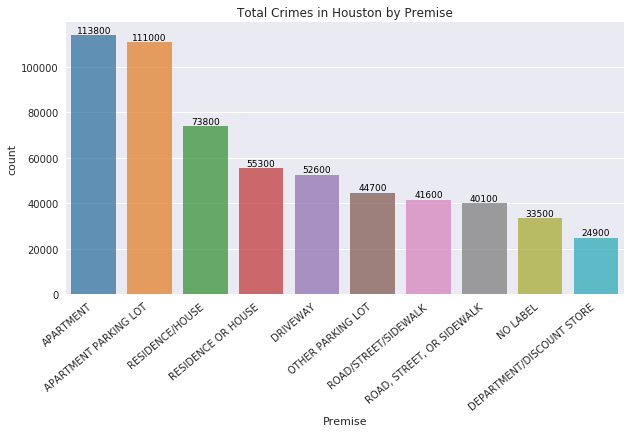

In [76]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="Premise",data=top_premise, alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Total Crimes in Houston by Premise');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

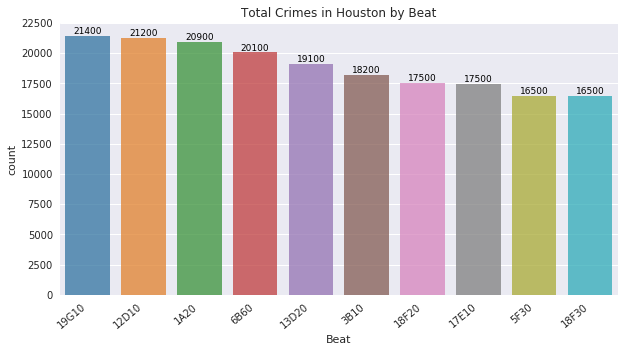

In [77]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="Beat",data=top_beat, alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Total Crimes in Houston by Beat');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

# compare Offense Types

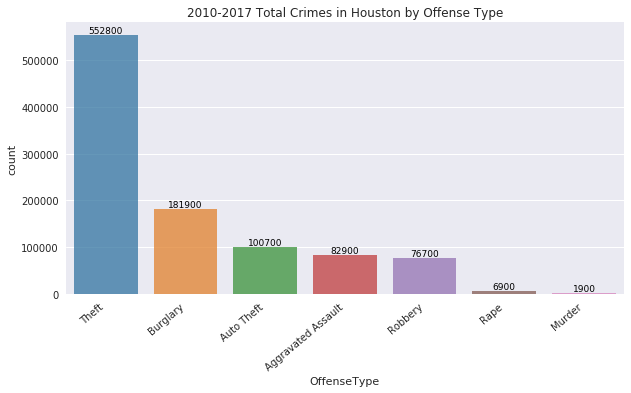

In [142]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="OffenseType", data=crimes,alpha=0.75,
             order=crimes['OffenseType'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017 Total Crimes in Houston by Offense Type');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

In [143]:
# create a dataframe with just the two bottom offense types
dfrm = crimes.loc[(crimes.OffenseType =='Rape') | (crimes.OffenseType =='Murder')]

In [157]:
dfrm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8764 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           8764 non-null object
BlockRange     8762 non-null object
StreetName     8764 non-null object
OffenseType    8764 non-null object
Premise        8764 non-null object
NumOffenses    8764 non-null float64
Hour           541 non-null float64
day            8764 non-null int64
weekday        8764 non-null object
month          8764 non-null object
year           8764 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


In [158]:
dfrm.OffenseType.unique()

array(['Rape', 'Murder'], dtype=object)

In [160]:
dfrm.OffenseType.value_counts()

Rape      6861
Murder    1903
Name: OffenseType, dtype: int64

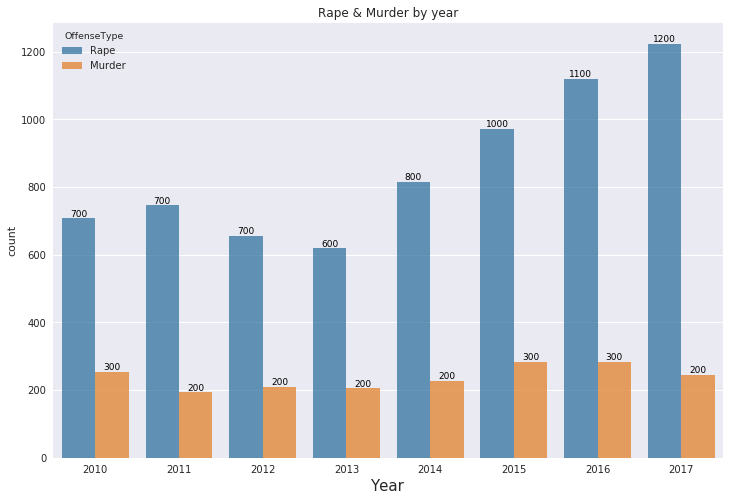

In [161]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='year',
              hue='OffenseType',
              data=dfrm,
              alpha=0.75)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')

ax.set_title('Rape & Murder by year')
ax.set_xlabel('Year', fontsize=15);

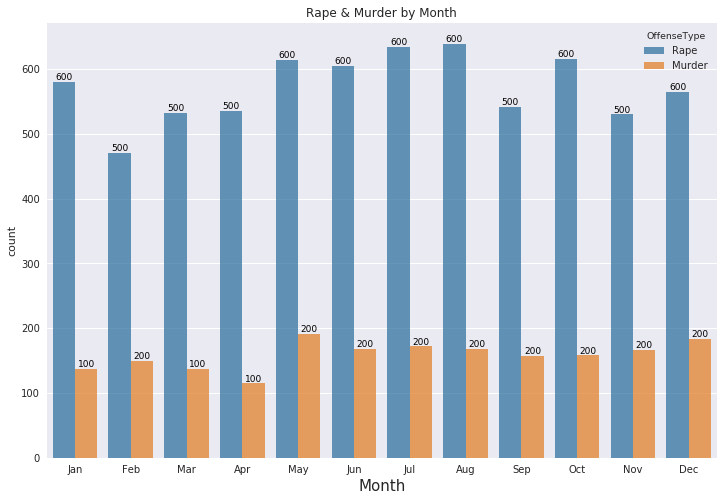

In [162]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='month',
              hue='OffenseType',
              data=dfrm,
              alpha=0.75)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')

ax.set_title('Rape & Murder by Month')
ax.set_xlabel('Month', fontsize=15);

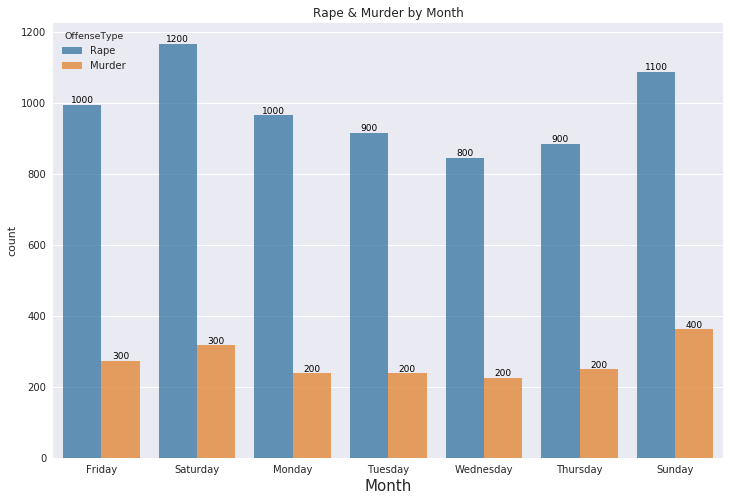

In [164]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='weekday',
              hue='OffenseType',
              data=dfrm,
              alpha=0.75)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')

ax.set_title('Rape & Murder by Month')
ax.set_xlabel('Month', fontsize=15);

# Answers
## From a dataset of reported type 1 crimes in Houston Texas from 2010- 2017

- Type of offense with the max values
    - Theft $552802$

- Total crimes by week
    - Friday has the most events with $552,802$
    - Sunday has the least with $128,320$
- Total crimes by Month
    - July  has the most events with $88,814$
    - February has the least with 7165
- Total crimes by Year
    - 2010 has the most with $136,357$
    - 2017 has the least with $118,580$
- Total crimes by the Hour ( has several data missing)
    - 6:00 pm is very popular with $4209$ events
    - 04:00 am had only $942$
    
- Total crimes by the top 10 Premise locations
    - Apartment and Apartment parking lot seem to be the most popular locations

- Total crimes by the top 10 (Police) Beat location
    - 19G10 with $21,422$
 
- Compare the two lowest offense types (rape & murder) by Year, Month, Weekday
    - rape was at its lowest on 2013 but it has double since  in only 4 years
    - Saturday and Sunday is the most popular date for rape to occur
    - Murder fluctuates between 200-300 every other year
    - Sunday is the most popular day for murder.